In [97]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

In [98]:
df=pd.read_csv("Stress_Quesstionaire.csv")

In [99]:
df

,Timestamp,Username,How often have you felt that you were unable to control the important things in your life?,How often have you felt that things were going your way?,How often have you been upset because of something that happened unexpectedly?,I find that I don't have time for my interests/hobbies outside of regular work.,How often have you been able to control irritations in your life?,How often have you found that you could not cope with all the things that you had to do?,"How often do you get a full, restful night of sleep?",To what extent do you believe your life has purpose?,...,How often have you been angered because of things that were outside of your control?,How often do you feel fear of failure in any competitive scenario?,How often have you felt difficulties were piling up so high that you could not overcome them?,How often have you felt confident about your ability to handle your personal problems?,"I experience mood swings, difficulty in making decisions, concentration and memory is impaired.",I frequently have guilt if I procrastinate tasks.,"In comparison with other people, how likely are you to see others as threatening, uncooperative or exploitative?",How often are you confused about the intentions of others towards you?,Do you feel stressed about not having enough money to participate in the same activities as peers?,Do you feel stressed about not managing your time well to be productive enough?
0,2019/08/30 8:42:54 PM GMT+5:30,shubhamgautam90@gmail.com,1,1,1,1,4,1,0,0,...,1,1,1,4,0,1,1,1,NaN,NaN
1,2019/08/30 9:39:32 PM GMT+5:30,NaN,3,2,4,2,2,2,1,2,...,3,3,3,3,2,2,1,3,3.0,2.0
2,2019/08/30 10:20:52 PM GMT+5:30,NaN,2,1,1,3,3,3,3,1,...,1,4,4,2,3,2,1,3,2.0,3.0
3,2019/08/30 10:22:52 PM GMT+5:30,NaN,3,0,3,3,0,3,2,1,...,3,4,3,2,3,4,3,3,1.0,3.0
4,2019/08/30 10:22:55 PM GMT+5:30,NaN,3,1,3,2,4,4,1,4,...,3,4,4,2,1,2,2,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019/10/02 11:45:53 AM GMT+5:30,NaN,0,3,0,4,0,3,0,3,...,3,3,0,4,0,4,0,4,3.0,2.0
303,2019/10/02 11:46:02 AM GMT+5:30,NaN,4,3,1,4,1,4,4,4,...,4,1,4,2,3,1,3,1,4.0,3.0
304,2019/10/02 11:46:15 AM GMT+5:30,NaN,3,3,3,3,4,3,3,3,...,3,4,3,3,3,4,3,0,4.0,2.0
305,2019/10/02 11:46:33 AM GMT+5:30,NaN,4,3,1,4,1,3,1,4,...,4,3,1,3,2,3,2,3,2.0,3.0


In [100]:
del df['Timestamp']
del df['Username']

In [101]:
df

,How often have you felt that you were unable to control the important things in your life?,How often have you felt that things were going your way?,How often have you been upset because of something that happened unexpectedly?,I find that I don't have time for my interests/hobbies outside of regular work.,How often have you been able to control irritations in your life?,How often have you found that you could not cope with all the things that you had to do?,"How often do you get a full, restful night of sleep?",To what extent do you believe your life has purpose?,Most of my activities in life are shaped by society?,How often have you felt that you were on top of things?,How often have you been angered because of things that were outside of your control?,How often do you feel fear of failure in any competitive scenario?,How often have you felt difficulties were piling up so high that you could not overcome them?,How often have you felt confident about your ability to handle your personal problems?,"I experience mood swings, difficulty in making decisions, concentration and memory is impaired.",I frequently have guilt if I procrastinate tasks.,"In comparison with other people, how likely are you to see others as threatening, uncooperative or exploitative?",How often are you confused about the intentions of others towards you?,Do you feel stressed about not having enough money to participate in the same activities as peers?,Do you feel stressed about not managing your time well to be productive enough?
0,1,1,1,1,4,1,0,0,2,2,1,1,1,4,0,1,1,1,NaN,NaN
1,3,2,4,2,2,2,1,2,2,2,3,3,3,3,2,2,1,3,3.0,2.0
2,2,1,1,3,3,3,3,1,3,3,1,4,4,2,3,2,1,3,2.0,3.0
3,3,0,3,3,0,3,2,1,3,1,3,4,3,2,3,4,3,3,1.0,3.0
4,3,1,3,2,4,4,1,4,2,2,3,4,4,2,1,2,2,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0,3,0,4,0,3,0,3,0,4,3,3,0,4,0,4,0,4,3.0,2.0
303,4,3,1,4,1,4,4,4,3,1,4,1,4,2,3,1,3,1,4.0,3.0
304,3,3,3,3,4,3,3,3,4,4,3,4,3,3,3,4,3,0,4.0,2.0
305,4,3,1,4,1,3,1,4,4,1,4,3,1,3,2,3,2,3,2.0,3.0


In [102]:
def UnlabToLab2(array):
     for i in range(len(array)):
        if array[i]==0:
            array[i]=4
        elif array[i]==1:
            array[i]=3
        elif array[i]==2:
            array[i]=2
        elif array[i]==3:
            array[i]=1
        elif array[i]==4:
            array[i]=0

In [103]:
UnlabToLab2(df['How often have you felt difficulties were piling up so high that you could not overcome them?'])
UnlabToLab2(df['How often have you felt confident about your ability to handle your personal problems?'])
UnlabToLab2(df['How often have you felt that you were on top of things?'])
UnlabToLab2(df['To what extent do you believe your life has purpose?'])
UnlabToLab2(df['How often do you get a full, restful night of sleep?'])
UnlabToLab2(df['How often have you been able to control irritations in your life?'])
UnlabToLab2(df['How often have you felt that things were going your way?'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\4227595496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array[i]=3
C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\4227595496.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array[i]=1
C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\4227595496.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array[i]=0
C:\Users\DELL\AppData\Local\Temp\ipykernel_18224\4227595496.py:4: Se

In [104]:
df

,How often have you felt that you were unable to control the important things in your life?,How often have you felt that things were going your way?,How often have you been upset because of something that happened unexpectedly?,I find that I don't have time for my interests/hobbies outside of regular work.,How often have you been able to control irritations in your life?,How often have you found that you could not cope with all the things that you had to do?,"How often do you get a full, restful night of sleep?",To what extent do you believe your life has purpose?,Most of my activities in life are shaped by society?,How often have you felt that you were on top of things?,How often have you been angered because of things that were outside of your control?,How often do you feel fear of failure in any competitive scenario?,How often have you felt difficulties were piling up so high that you could not overcome them?,How often have you felt confident about your ability to handle your personal problems?,"I experience mood swings, difficulty in making decisions, concentration and memory is impaired.",I frequently have guilt if I procrastinate tasks.,"In comparison with other people, how likely are you to see others as threatening, uncooperative or exploitative?",How often are you confused about the intentions of others towards you?,Do you feel stressed about not having enough money to participate in the same activities as peers?,Do you feel stressed about not managing your time well to be productive enough?
0,1,3,1,1,0,1,4,4,2,2,1,1,3,0,0,1,1,1,NaN,NaN
1,3,2,4,2,2,2,3,2,2,2,3,3,1,1,2,2,1,3,3.0,2.0
2,2,3,1,3,1,3,1,3,3,1,1,4,0,2,3,2,1,3,2.0,3.0
3,3,4,3,3,4,3,2,3,3,3,3,4,1,2,3,4,3,3,1.0,3.0
4,3,3,3,2,0,4,3,0,2,2,3,4,0,2,1,2,2,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0,1,0,4,4,3,4,1,0,0,3,3,4,0,0,4,0,4,3.0,2.0
303,4,1,1,4,3,4,0,0,3,3,4,1,0,2,3,1,3,1,4.0,3.0
304,3,1,3,3,0,3,1,1,4,0,3,4,1,1,3,4,3,0,4.0,2.0
305,4,1,1,4,3,3,3,0,4,3,4,3,3,1,2,3,2,3,2.0,3.0


In [105]:
df=df.drop(df.index[0])

In [106]:
df.columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20']

In [107]:
df
# df.to_csv("mentalStressDataSet.csv")
# np.savetxt("mentalStressDataSet.csv", df, delimiter=",", header = "Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18, Q19, Q20")

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
1,3,2,4,2,2,2,3,2,2,2,3,3,1,1,2,2,1,3,3.0,2.0
2,2,3,1,3,1,3,1,3,3,1,1,4,0,2,3,2,1,3,2.0,3.0
3,3,4,3,3,4,3,2,3,3,3,3,4,1,2,3,4,3,3,1.0,3.0
4,3,3,3,2,0,4,3,0,2,2,3,4,0,2,1,2,2,3,1.0,3.0
5,2,1,3,2,1,2,4,3,3,1,4,3,1,1,3,3,3,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0,1,0,4,4,3,4,1,0,0,3,3,4,0,0,4,0,4,3.0,2.0
303,4,1,1,4,3,4,0,0,3,3,4,1,0,2,3,1,3,1,4.0,3.0
304,3,1,3,3,0,3,1,1,4,0,3,4,1,1,3,4,3,0,4.0,2.0
305,4,1,1,4,3,3,3,0,4,3,4,3,3,1,2,3,2,3,2.0,3.0


In [108]:
df = StandardScaler().fit_transform(df)

In [109]:
df1 = pd.DataFrame(data = df, columns= ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20'])
# # Create the correlation matrix
corr_matrix = df1.corr()

# Print the correlation matrix
# # print(corr_matrix)
# corr_matrix.to_csv("correlation_matrix.csv")

In [110]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDF=pd.DataFrame(data=principalComponents,columns=['P1','P2'])
principalDF

,P1,P2
0,-0.139420,0.104261
1,-0.413390,-0.481051
2,-1.733305,-0.126021
3,-1.067436,-0.504838
4,-0.616119,-0.346936
...,...,...
301,1.977353,-4.795627
302,-2.025788,1.497088
303,-2.088263,0.508040
304,-0.974129,-1.331686


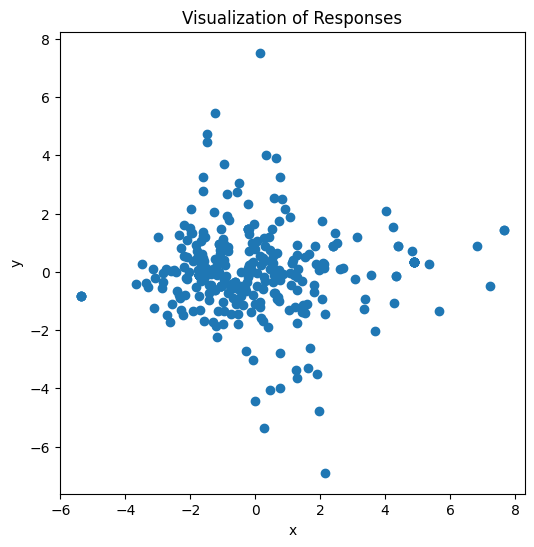

In [111]:
plt.figure(figsize=(6,6))
plt.scatter(principalDF.iloc[:, 0], principalDF.iloc[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of Responses');

In [112]:
dfX=pd.read_csv("1.csv")
dfY=pd.read_csv("22.csv")

In [113]:
dfX = StandardScaler().fit_transform(dfX)

In [114]:
dfX

array([[-1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00, -1.41421356e+00,
        -1.41421356e+00, -1.41421356e+00],
       [-7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01,
        -7.07106781e-01, -7.07106781e-01],
       [-4.44089211e-17, -4.44089211e-17, -4.44089211e-17,
        -4.44089211e-17, -4.44089211e-17, -4.44089211e-17,
        -4.44089211e-17, -4.44089211e-17, -4.44089211e-17,
        -4.44089211e-17, -4.4

In [115]:
principalComponentsX = pca.fit_transform(dfX)

In [116]:
principalDFX=pd.DataFrame(data=principalComponentsX,columns=['P1','P2'])

In [117]:
principalDFX

,P1,P2
0,-6.324555e+00,5.807220e-16
1,-3.162278e+00,-1.935740e-16
2,-3.332617e-25,3.060016e-41
3,3.162278e+00,1.935740e-16
4,6.324555e+00,3.871480e-16


In [118]:
dfY

,Y
0,VERY LOW
1,LOW
2,MEDIUM
3,HIGH
4,VERY HIGH


In [119]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [120]:
classifier.fit(principalDFX, dfY)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [121]:
y_pred = classifier.predict(principalDF)

In [122]:
for i in range(len(y_pred)):
    if y_pred[i]=='VERY LOW':
        y_pred[i]=0
    elif y_pred[i]=='LOW':
        y_pred[i]=1
    elif y_pred[i]=='MEDIUM':
        y_pred[i]=2
    elif y_pred[i]=='HIGH':
        y_pred[i]=3
    else:
        y_pred[i]=4

In [123]:
#Type covert object to array 
y_pred=y_pred.astype(str)
y_pred= y_pred.astype(int)

In [124]:
y_pred

array([2, 2, 1, 2, 2, 4, 4, 2, 3, 2, 2, 2, 1, 4, 2, 2, 0, 2, 1, 3, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 0, 1, 2, 3, 4, 1,
       1, 1, 1, 1, 1, 2, 3, 2, 4, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 3, 2, 2,
       1, 2, 2, 3, 2, 1, 3, 2, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 1, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 4, 3, 4, 4, 4, 3, 3, 1, 2, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       3, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3,
       3, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 2, 0, 2, 2, 1, 2, 2, 2, 2, 4,
       2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,

In [125]:
y_pred[100]=4

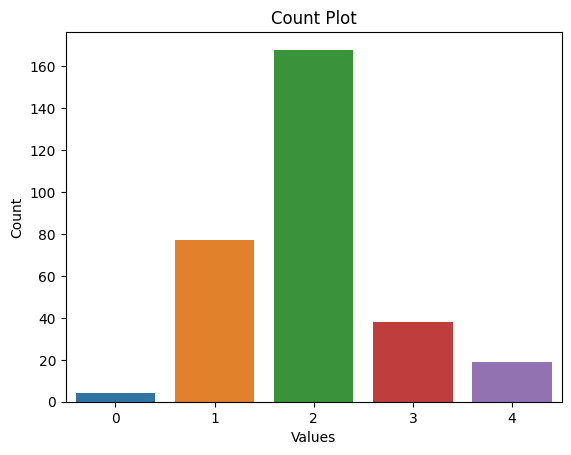

In [126]:
# Convert the array to a DataFrame
df2 = pd.DataFrame({"values": y_pred})
# Create the count plot
sns.countplot(x="values", data=df2)

# Add a title and labels
plt.title("Count Plot")
plt.xlabel("Values")
plt.ylabel("Count")

# Show the plot
plt.show()

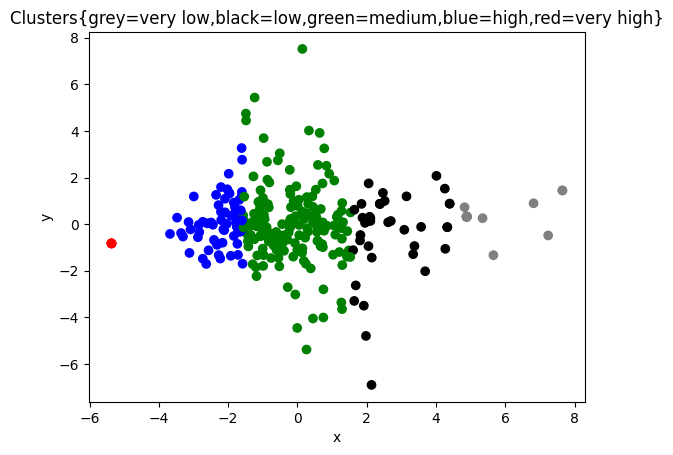

In [127]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(principalDF.P1 , principalDF.P2, c = colormapS[y_pred])
plt.title('Clusters{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [128]:
Y_labels=pd.DataFrame(y_pred)

Logistic Regression without PCA

In [129]:
X_t , X_te , Y_t , Y_te=train_test_split(df,y_pred,test_size=0.33,random_state=0)

In [130]:
pCTe = pca.fit_transform(X_te)
pCTe1=pd.DataFrame(data=pCTe,columns=['G1','G2'])

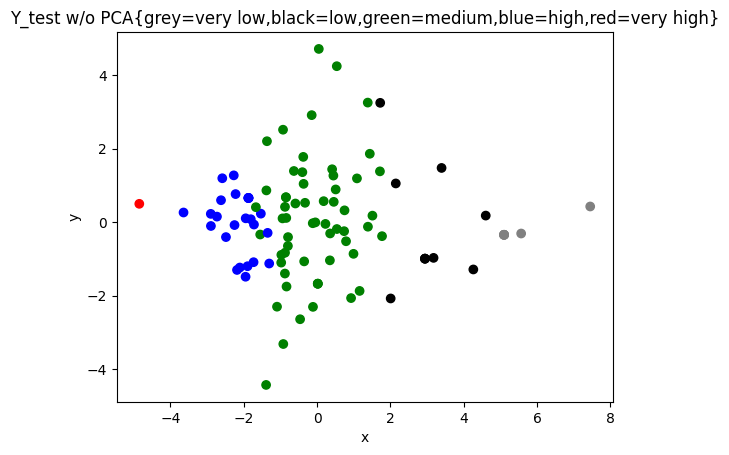

In [131]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTe1.G1 , pCTe1.G2, c = colormapS[Y_te])
plt.title('Y_test w/o PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [132]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_t,Y_t)

LogisticRegression()

In [133]:
Y_log2=logisticRegr.predict(X_te)
# print(Y_log2)
# Y_log4 = Y_log2.astype(str).astype(int)
print(Y_log2)

[2 1 1 2 2 2 2 1 2 2 2 2 4 2 2 1 1 4 2 2 2 4 2 1 1 4 2 1 3 2 2 2 2 2 2 1 2
 1 2 2 2 4 2 1 3 3 1 2 2 4 4 2 2 2 2 4 2 2 2 1 2 1 2 2 2 2 4 3 3 2 1 1 1 1
 2 2 2 1 1 1 2 2 2 2 0 1 2 2 2 2 2 2 2 1 1 1 1 1 3 2 1]


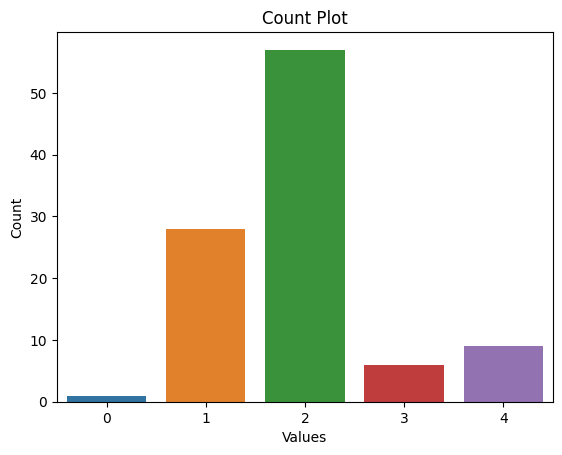

In [134]:
# Convert the array to a DataFrame
df2 = pd.DataFrame({"values": Y_log2})
# Create the count plot
sns.countplot(x="values", data=df2)

# Add a title and labels
plt.title("Count Plot")
plt.xlabel("Values")
plt.ylabel("Count")

# Show the plot
plt.show()

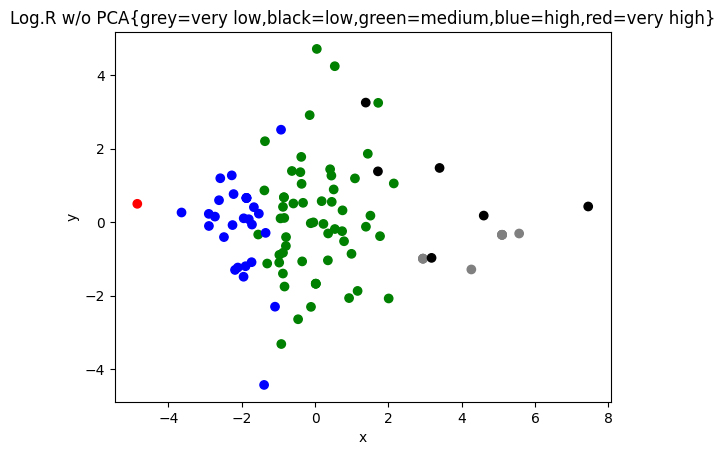

In [135]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTe1.G1 , pCTe1.G2, c = colormapS[Y_log2])
plt.title('Log.R w/o PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [136]:
logisticRegr.score(X_te,Y_te)

0.8514851485148515

In [137]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - Without PCA, Logistic Reression")
confusion_matrix(Y_te, Y_log2)

Confusion Matrix - Without PCA, Logistic Reression


array([[ 1,  0,  0,  0,  0],
       [ 0, 24,  1,  0,  0],
       [ 0,  4, 53,  2,  0],
       [ 0,  0,  3,  3,  4],
       [ 0,  0,  0,  1,  5]], dtype=int64)

## SVM without PCA

In [138]:
clf = svm.SVC()
clf.fit(X_t, Y_t)

SVC()

In [139]:
Y_SVM = clf.predict(X_te)

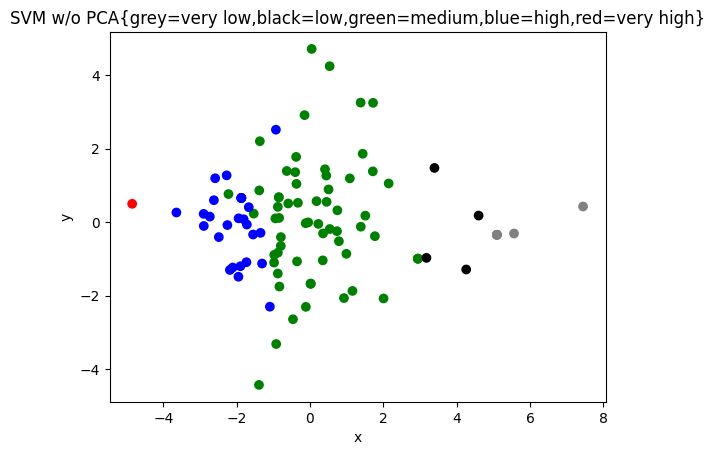

In [140]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTe1.G1 , pCTe1.G2, c = colormapS[Y_SVM])
plt.title('SVM w/o PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [141]:
metrics.accuracy_score(Y_te,Y_SVM )

0.8811881188118812

In [142]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - Without PCA, SVM")
confusion_matrix(Y_te, Y_SVM)

Confusion Matrix - Without PCA, SVM


array([[ 1,  0,  0,  0,  0],
       [ 0, 23,  2,  0,  0],
       [ 0,  4, 55,  0,  0],
       [ 0,  0,  6,  4,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [143]:
len(df)

306

## PCA

In [144]:
pca = PCA(n_components=6)
pCz = pca.fit_transform(df)
pCza=pd.DataFrame(data=pCz,columns=['P1','P2','P3','P4','P5','P6'])
pCza

,P1,P2,P3,P4,P5,P6
0,-0.139420,0.104261,0.188567,-0.826338,-0.848795,-0.858085
1,-0.413390,-0.481051,-0.203087,1.014417,1.290395,0.475067
2,-1.733305,-0.126021,2.867454,0.225085,1.229640,-0.366729
3,-1.067436,-0.504838,0.688275,-0.588330,-1.556505,-0.450034
4,-0.616119,-0.346936,-0.256177,-1.617961,0.771238,0.876616
...,...,...,...,...,...,...
301,1.977353,-4.795627,-0.350200,0.796704,0.179226,-0.634102
302,-2.025788,1.497088,-0.460307,1.199157,-0.316646,0.894328
303,-2.088263,0.508040,-2.562606,0.674536,-0.013164,-1.160048
304,-0.974129,-1.331686,0.610055,-0.845620,0.340520,-0.504591


In [145]:
#With PCA
X_train , X_test , Y_train , Y_test=train_test_split(pCza,y_pred,test_size=0.33,random_state=0)

In [146]:
pca = PCA(n_components=2)
pCTze = pca.fit_transform(X_test)
pCTzae=pd.DataFrame(data=pCTze,columns=['G1','G2'])

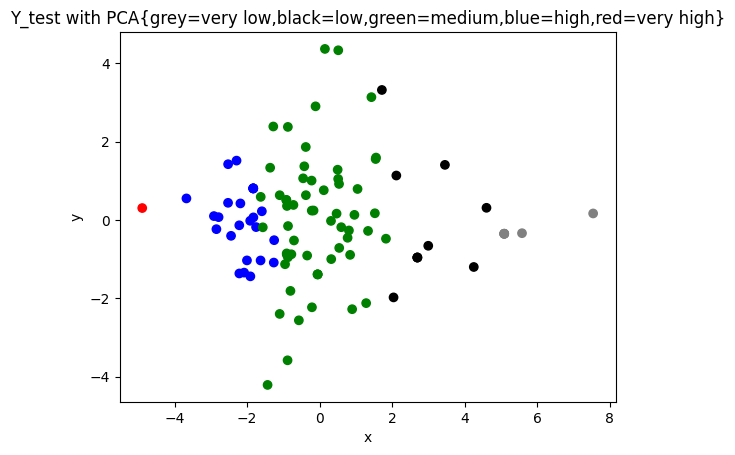

In [147]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTzae.G1 , pCTzae.G2, c = colormapS[Y_test])
plt.title('Y_test with PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Logistic Regression with PCA

In [148]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,Y_train)

LogisticRegression()

In [149]:
Y_log1=logisticRegr.predict(X_test)

In [150]:
Y_log1

array([2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2, 1, 1, 4, 2, 2, 2, 4,
       2, 1, 1, 4, 2, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 4, 3, 1,
       4, 3, 1, 2, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1,
       4, 3, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1])

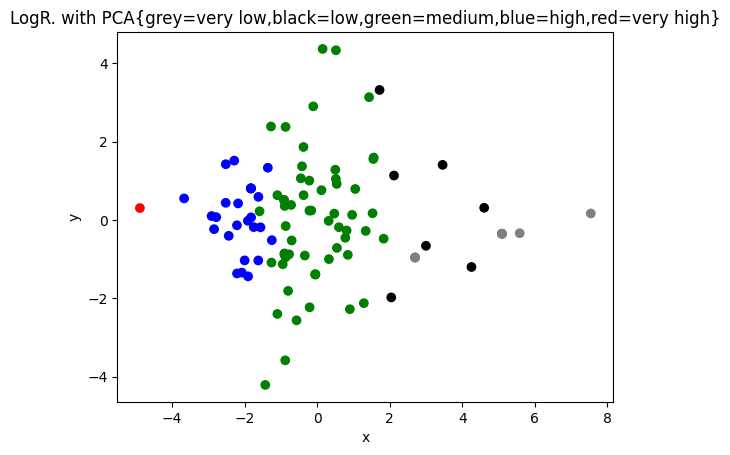

In [151]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTzae.G1 , pCTzae.G2, c = colormapS[Y_log1])
plt.title('LogR. with PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [152]:
logisticRegr.score(X_test,Y_test)

0.9207920792079208

In [153]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - With PCA, Logistic Regresssion")
confusion_matrix(Y_test, Y_log1)

Confusion Matrix - With PCA, Logistic Regresssion


array([[ 1,  0,  0,  0,  0],
       [ 0, 23,  2,  0,  0],
       [ 0,  3, 56,  0,  0],
       [ 0,  0,  0,  7,  3],
       [ 0,  0,  0,  0,  6]], dtype=int64)

## SVM with PCA

In [154]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [155]:
Y_svc = clf.predict(X_test)

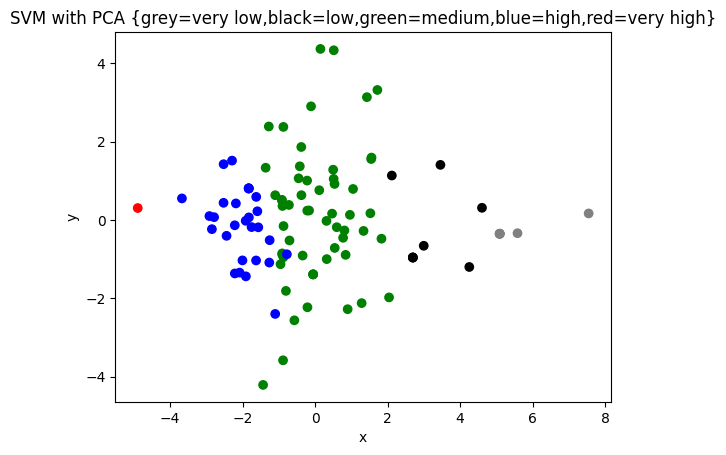

In [156]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTzae.G1 , pCTzae.G2, c = colormapS[Y_svc])
plt.title('SVM with PCA {grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [157]:
metrics.accuracy_score(Y_test,Y_svc)

0.9405940594059405

In [158]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - With PCA, SVM")
confusion_matrix(Y_test, Y_svc)

Confusion Matrix - With PCA, SVM


array([[ 1,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  4, 55,  0,  0],
       [ 0,  0,  2,  8,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

## Random Forest without PCA

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier()

In [161]:
model.fit(X_t,Y_t)

RandomForestClassifier()

In [162]:
rf_predictions = model.predict(X_te)

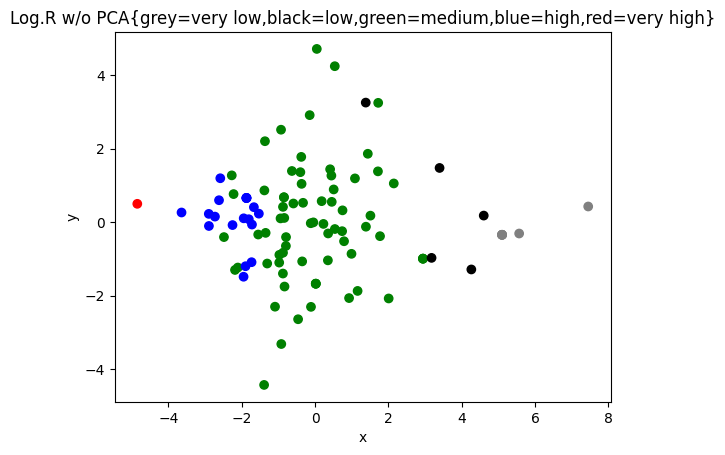

In [163]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTe1.G1 , pCTe1.G2, c = colormapS[rf_predictions])
plt.title('Log.R w/o PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [164]:
model.score(X_te,Y_te)

0.8514851485148515

In [165]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - Without PCA, Random Forest")
confusion_matrix(Y_te, rf_predictions)

Confusion Matrix - Without PCA, Random Forest


array([[ 1,  0,  0,  0,  0],
       [ 0, 18,  7,  0,  0],
       [ 0,  1, 57,  1,  0],
       [ 0,  0,  6,  4,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

macro_avg = (f1_score_1 + f1_score_2 + ... + f1_score_n) / n
weighted_avg = (f1_score_1 * support_1 + f1_score_2 * support_2 + ... + f1_score_n * support_n) / (support_1 + support_2 + ... + support_n)

In [166]:
print(classification_report(Y_te, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.95      0.72      0.82        25
           2       0.81      0.97      0.88        59
           3       0.80      0.40      0.53        10
           4       1.00      1.00      1.00         6

    accuracy                           0.85       101
   macro avg       0.91      0.82      0.85       101
weighted avg       0.86      0.85      0.84       101



In [167]:
matthews_corrcoef(Y_te, rf_predictions) 

0.7408613064045312

## Naive Bayes without PCA

In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
model2 = GaussianNB()

In [170]:
model2.fit(X_t,Y_t)

GaussianNB()

In [171]:
nb_predicted= model2.predict(X_te)

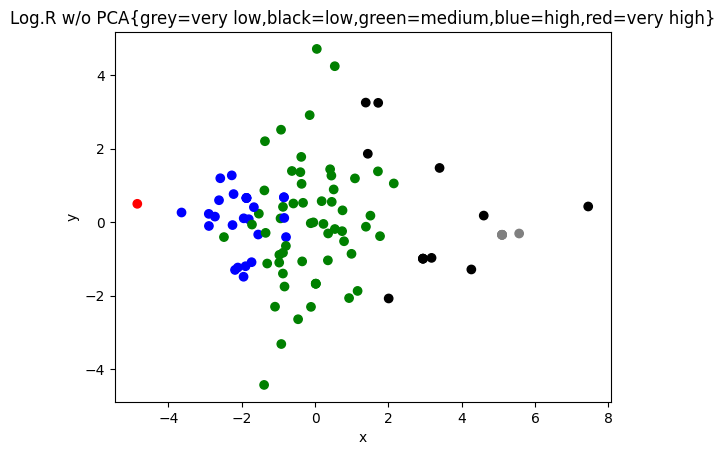

In [172]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTe1.G1 , pCTe1.G2, c = colormapS[nb_predicted])
plt.title('Log.R w/o PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [173]:
model2.score(X_te,Y_te)

0.8514851485148515

In [174]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - Without PCA, Naive Bayes")
confusion_matrix(Y_te, nb_predicted)

Confusion Matrix - Without PCA, Naive Bayes


array([[ 1,  0,  0,  0,  0],
       [ 0, 20,  5,  0,  0],
       [ 0,  6, 51,  2,  0],
       [ 0,  0,  1,  9,  0],
       [ 0,  0,  0,  1,  5]], dtype=int64)

In [175]:
print(classification_report(Y_te, nb_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.77      0.80      0.78        25
           2       0.89      0.86      0.88        59
           3       0.75      0.90      0.82        10
           4       1.00      0.83      0.91         6

    accuracy                           0.85       101
   macro avg       0.88      0.88      0.88       101
weighted avg       0.86      0.85      0.85       101



In [176]:
matthews_corrcoef(Y_te, nb_predicted) 

0.7497248544866357

## Random forest with PCA

In [177]:
model = RandomForestClassifier()

In [178]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [179]:
rfPCA_predictions = model.predict(X_test)

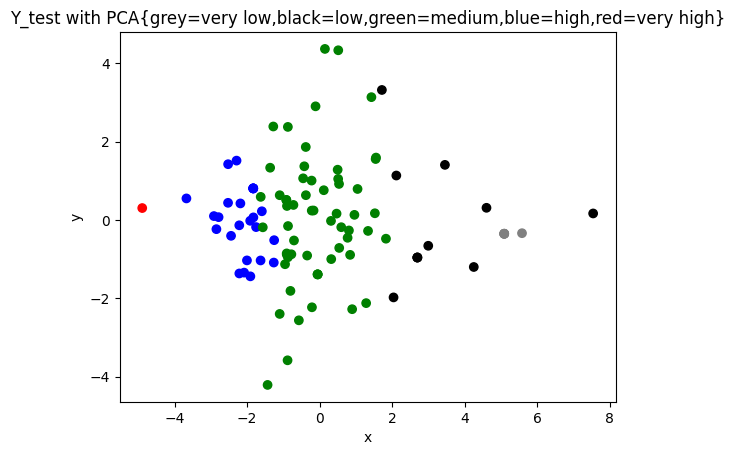

In [180]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTzae.G1 , pCTzae.G2, c = colormapS[rfPCA_predictions])
plt.title('Y_test with PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [181]:
model.score(X_test,Y_test)

0.9900990099009901

In [182]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - With PCA, Random Forest")
confusion_matrix(Y_test, rfPCA_predictions)

Confusion Matrix - With PCA, Random Forest


array([[ 1,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 59,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  1,  5]], dtype=int64)

In [183]:
print(classification_report(Y_test, rfPCA_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        59
           3       0.91      1.00      0.95        10
           4       1.00      0.83      0.91         6

    accuracy                           0.99       101
   macro avg       0.98      0.97      0.97       101
weighted avg       0.99      0.99      0.99       101



In [184]:
matthews_corrcoef(Y_test, rfPCA_predictions)  

0.9832020938199315

## Naive Bayes with PCA

In [185]:
model2 = GaussianNB()

In [186]:
model2.fit(X_train,Y_train)

GaussianNB()

In [187]:
nbPCA_predicted= model2.predict(X_test)

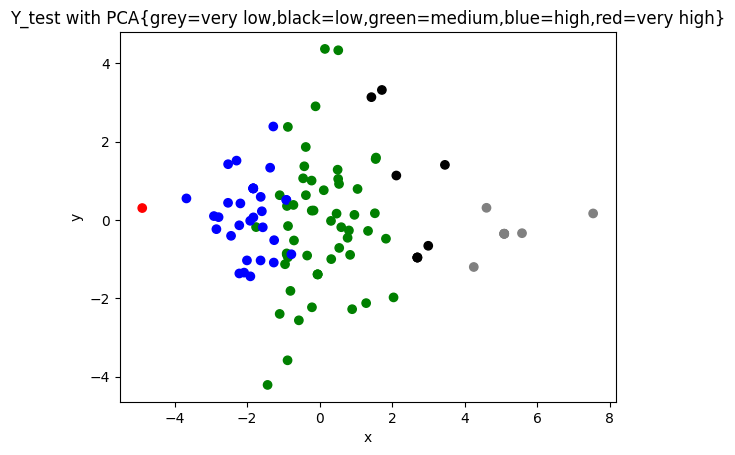

In [188]:
colormapS = np.array(['Red', 'Blue', 'Green', 'Black', 'grey'])
k = plt.scatter(pCTzae.G1 , pCTzae.G2, c = colormapS[nbPCA_predicted])
plt.title('Y_test with PCA{grey=very low,black=low,green=medium,blue=high,red=very high}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [189]:
model2.score(X_test,Y_test)

0.8811881188118812

In [192]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix - With PCA, Naive Bayes")
confusion_matrix(Y_test, nbPCA_predicted)

Confusion Matrix - With PCA, Naive Bayes


array([[ 1,  0,  0,  0,  0],
       [ 0, 24,  1,  0,  0],
       [ 0,  7, 51,  1,  0],
       [ 0,  0,  1,  7,  2],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [193]:
print(classification_report(Y_test, nbPCA_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.77      0.96      0.86        25
           2       0.96      0.86      0.91        59
           3       0.88      0.70      0.78        10
           4       0.75      1.00      0.86         6

    accuracy                           0.88       101
   macro avg       0.87      0.90      0.88       101
weighted avg       0.89      0.88      0.88       101



In [194]:
matthews_corrcoef(Y_test, nbPCA_predicted)  

0.8091277080782436

# K-fold cross validation without PCA

In [195]:
print(cross_val_score(LogisticRegression(solver="lbfgs", multi_class='auto'), df, y_pred,cv=5))
print((cross_val_score(LogisticRegression(solver="lbfgs", multi_class='auto'), df, y_pred,cv=5)).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.90322581 0.85245902 0.85245902 0.86885246 0.85245902]
0.8658910629296667


In [196]:
print(cross_val_score(svm.SVC(gamma='auto'), df, y_pred,cv=5))
print((cross_val_score(svm.SVC(gamma='auto'), df, y_pred,cv=5)).mean())

[0.90322581 0.86885246 0.90163934 0.83606557 0.81967213]
0.8658910629296667


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [197]:
print((cross_val_score(RandomForestClassifier(n_estimators=40),df, y_pred,cv=5)))
print((cross_val_score(RandomForestClassifier(n_estimators=40),df, y_pred,cv=5)).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.88709677 0.78688525 0.85245902 0.73770492 0.7704918 ]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.7972501322051824


In [198]:
print(cross_val_score(GaussianNB(),df, y_pred,cv=5))
print((cross_val_score(GaussianNB(),df, y_pred,cv=5)).mean())

[0.85483871 0.80327869 0.95081967 0.80327869 0.75409836]
0.833262823902697


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# K-fold cross validation with PCA

In [199]:
print(cross_val_score(LogisticRegression(solver="lbfgs", multi_class='auto'), pCza, y_pred,cv=5))
print((cross_val_score(LogisticRegression(solver="lbfgs", multi_class='auto'), pCza, y_pred,cv=5)).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.93548387 0.98360656 0.98360656 0.86885246 0.86885246]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.9280803807509252


In [200]:
print(cross_val_score(svm.SVC(gamma='auto'), pCza, y_pred,cv=5))
print((cross_val_score(svm.SVC(gamma='auto'), pCza, y_pred,cv=5)).mean())

[0.88709677 0.95081967 0.86885246 0.83606557 0.81967213]
0.8725013220518243


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [201]:
print((cross_val_score(RandomForestClassifier(n_estimators=15),pCza, y_pred,cv=5)))
print((cross_val_score(RandomForestClassifier(n_estimators=15),pCza, y_pred,cv=5)).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[0.9516129  0.98360656 0.95081967 1.         0.98360656]
0.9804865150713908


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [202]:
print(cross_val_score(GaussianNB(),pCza, y_pred,cv=5))
print((cross_val_score(GaussianNB(),pCza, y_pred,cv=5)).mean())

[0.90322581 0.96721311 0.90163934 0.86885246 0.90163934]
0.908514013749339


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
